## Essential Libraries


In [ ]:
!pip install scikit-dimension
!pip install umap-learn
!pip install --upgrade scikit-learn
!pip install --upgrade gap-stat
!pip install scikit-network
!pip install dask[complete] dask_ml
!pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 33.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=81ec6d723c54b586debcedd266aa1eadb5a7e6009859e542b0385b36659a61a0
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=aff873c49cb4b787cb84729b559074da412fd221bfec4855635b3fc9a9b2a5eb
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-py

## Loading Dataset from Google Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
!cp 'drive/MyDrive/optimizer/data/R43.zip' R43.zip

In [ ]:
!unzip R43.zip

Archive:  R43.zip
  inflating: R43.txt                 


In [ ]:
!head R43.txt

100 83732 _ 49 600

981.52 -45.14 50.93 -75.04 -89.60 82.85 66.66 64.94 12.18 -74.01 -44.93 47.90 86.32 -3.35 50.78 52.37 -80.44 -106.14 -81.31 6.94 -15.73 24.08 31.85 13.93 61.17 -82.59 -24.17 59.79 46.75 44.55 -39.35 82.68 116.39 25.97 31.49 3.58 3.23 -84.50 85.78 -1.38 105.52 -92.14 -102.43 -2.30 75.87 25.70 44.94 -49.16 -19.61 36.19 28.87 -37.84 -20.16 20.58 -70.81 -104.00 -2.21 80.48 -108.22 -95.99 5.25 -123.31 77.12 105.19 -76.86 92.95 72.31 -39.49 -92.72 62.29 116.30 10.30 92.16 35.02 30.09 2.56 91.14 -62.58 82.16 -56.65 -78.34 -88.44 107.72 -35.07 -9.63 -76.30 -72.24 -19.60 -51.15 -1.52 -154.92 -45.06 -3.32 -73.05 94.17 -20.44 57.76 18.45 -105.05 -64.45
24.45 14.14 -3.51 1.05 17.81 10.63 28.94 4.65 49.17 47.31 8.77 10.94 18.41 56.32 7.65 41.72 27.57 47.94 14.92 14.43 8.58 37.70 17.97 8.75 9.58 16.15 26.18 3.11 11.32 58.00 -2.85 16.11 25.25 13.47 36.08 26.67 32.40 8.58 18.70 31.92 12.72 31.27 53.30 30.18 9.79 41.20 41.56 48.34 36.71 20.41 24.46 23.19 46.00 36.06 27.85 18.86 9.82

In [ ]:
with open('R43.txt') as fp:
  line = fp.readline()
  line = line.split(' ')
  d, n, k, p = [int(item) for item in line if item!='_']
  # line = fp.readline()
  # line = line.split(' ')
  # K = [int(item) for item in line]


In [ ]:
!tail -n +3 R43.txt > R43_clean.txt

In [ ]:
vectors = np.fromfile('R43_clean.txt', sep=' ').reshape(n, -1)

In [ ]:
vectors.shape

(83732, 100)

In [ ]:
from sklearn.neighbors import KDTree

def detect_outliers_knn(points):
  tree = KDTree(points)
  dists = []
  for point in tqdm(range(points.shape[0])):
    dist, ind = tree.query(points[point:point+1, :], k=8)
    dists.append((dist[0][1:].max(), ind[0][0]))
  return dists

outlier_ind = []
if p > 0:
  outlier_dists = sorted(detect_outliers_knn(vectors), key=lambda x: x[0])
  outlier_ind = [x[1] for x in outlier_dists[-p:]]

  0%|          | 0/83732 [00:00<?, ?it/s]

In [ ]:
outlier_ind

[729,
 11913,
 699,
 572,
 3577,
 5441,
 10419,
 516,
 7642,
 1108,
 402,
 1138,
 20907,
 476,
 10,
 741,
 91,
 11946,
 319,
 4062,
 1278,
 18944,
 1309,
 493,
 1502,
 628,
 980,
 4558,
 4806,
 53870,
 11730,
 2475,
 1648,
 8387,
 614,
 1643,
 1311,
 4108,
 15560,
 1625,
 8862,
 1015,
 20707,
 5014,
 748,
 2607,
 1561,
 9404,
 9519,
 7622,
 5849,
 981,
 7905,
 1397,
 4707,
 92,
 161,
 8486,
 66201,
 7702,
 1179,
 580,
 8273,
 1510,
 674,
 359,
 1614,
 840,
 2130,
 1287,
 42049,
 1973,
 1582,
 736,
 144,
 4768,
 462,
 3409,
 2870,
 3712,
 684,
 832,
 1205,
 808,
 12088,
 1177,
 920,
 9794,
 42,
 1481,
 16254,
 301,
 2285,
 529,
 6165,
 11265,
 469,
 321,
 277,
 13147,
 1088,
 2419,
 3946,
 243,
 3838,
 248,
 478,
 29093,
 4050,
 9694,
 5887,
 31353,
 3681,
 1295,
 4136,
 982,
 13795,
 720,
 7335,
 5514,
 4872,
 9412,
 258,
 1920,
 286,
 3637,
 2818,
 1530,
 1361,
 1609,
 1914,
 3101,
 457,
 14582,
 17218,
 8917,
 6024,
 3602,
 41415,
 4206,
 1149,
 1057,
 9054,
 4492,
 2169,
 392,
 182,

## Shuffling and Partitioning the dataset

In [ ]:
sample_size = 15000

np.random.seed(0)
pop = np.array(list(set(range(vectors.shape[0])) - set(outlier_ind)))
main_vectors_ind = list(np.random.choice(a=pop, replace=False, size=sample_size))
main_vectors = vectors[main_vectors_ind,:]

In [ ]:
main_vectors.shape

(15000, 25)

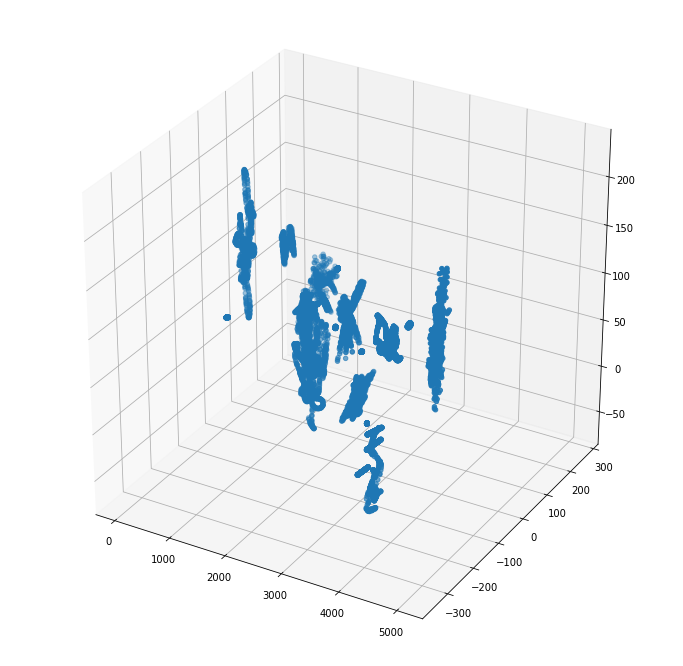

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2])
_ = plt.show()

In [ ]:
def manifold_sampler(X, n_samples, n_outliers=0):
  N = X.shape[0]
  k_n = int(N / n_samples) + 1
  W = np.zeros(N)
  # computing density of samples
  tree = KDTree(X)
  for point in tqdm(range(N)):
    dist, _ = tree.query(X[point:point+1], k=32)
    dist = dist[0][1:]
    W[point] = 1.0 / (1.0 + dist.mean())
  
  landmarks = np.random.choice(N, size=n_samples+n_outliers, replace=False)
  samples = []
  for point in tqdm(range(landmarks.shape[0])):
      l = landmarks[point]
      _, neighbors = tree.query(X[l:l+1], k=k_n)
      neighbors = neighbors[0]
      W_n = W[neighbors]
      W_n /= W_n.sum()
      selected = np.random.choice(neighbors, size=1, p=W_n)[0]
      samples.append(selected)
  samples = np.array(samples)
  return samples

In [ ]:
main_vectors_ind = manifold_sampler(vectors, 15000, p)
main_vectors_ind = main_vectors_ind[np.logical_not(np.isin(main_vectors_ind, np.array(outlier_ind)))]
main_vectors = vectors[main_vectors_ind]

  0%|          | 0/83732 [00:00<?, ?it/s]

  0%|          | 0/15600 [00:00<?, ?it/s]

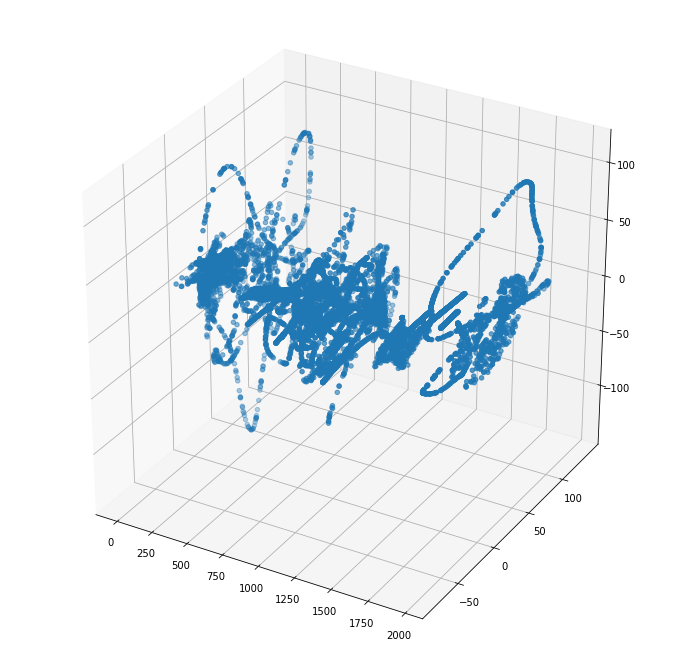

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2])
_ = plt.show()

In [ ]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=2)
reduced = reducer.fit_transform(main_vectors)

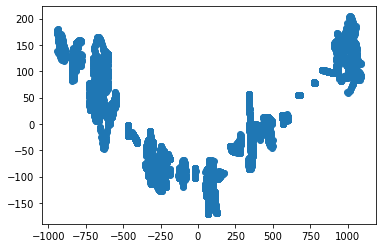

In [ ]:
_ = plt.scatter(reduced[:, 0], reduced[:, 1])

In [ ]:
from sknetwork.utils import KNNDense

knn_graph = KNNDense(n_neighbors=10).fit_transform(main_vectors)

In [ ]:
from sknetwork.clustering import Louvain

louvain = Louvain(resolution=0.00001)
labels = louvain.fit_transform(knn_graph)

In [ ]:
len(np.unique(labels))

45

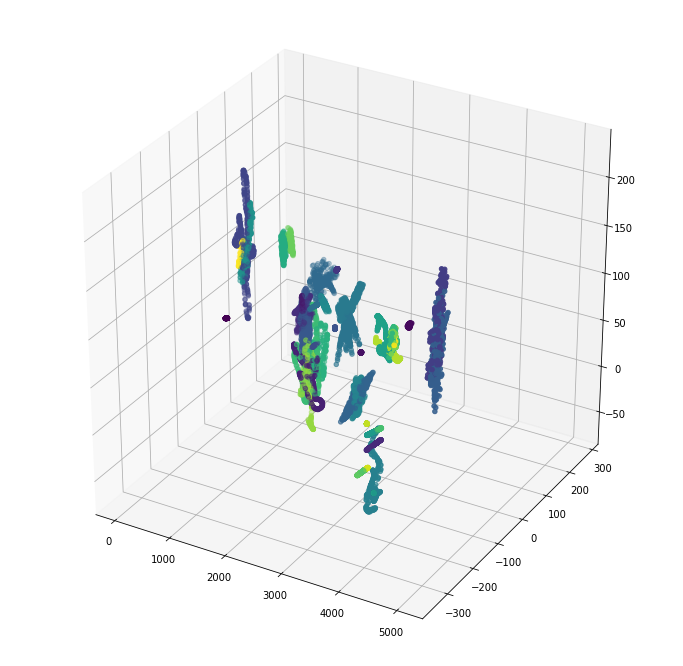

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2], c=labels)
_ = plt.show()

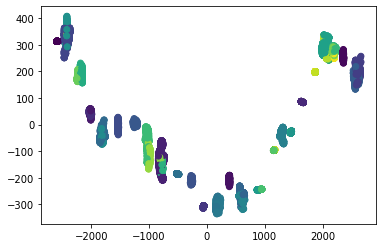

In [ ]:
_ = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels)

In [ ]:
import scipy
from functools import lru_cache
from sklearn.covariance import ledoit_wolf
from numba import jit
from scipy.special import softmax

class SparseAffinity():
  def __init__(self, n_data):
    self.n = n_data
    self.storage = [{} for _ in range(self.n)]
  
  def add(self, i, j):
    if j > i:
      i, j = j, i
    
    if not (j in self.storage[i]):
      self.storage[i][j] = 1.0
    else:
      self.storage[i][j] += 1.0
  
  def sparse(self):
    data = []
    row_index = []
    col_index = []

    for i in range(self.n):
      for j,v in self.storage[i].items():
        row_index.append(i)
        col_index.append(j)
        data.append(v)
    
    S = scipy.sparse.csr_matrix((data, (row_index, col_index)),shape=(self.n, self.n))
    return S + S.T
        

class RandomWalkAffinity():  
  def __init__(self, X, tree, path_length):
    self.X = X
    self.tree = tree
    self.path_length = path_length
    self.matrix = SparseAffinity(X.shape[0])

  def get_neighbors(self, point, return_dist=False, drop_first=False, k=16):
    dists, neighbors = self.tree.query(self.X[point:point+1], k=k)
    s = 0
    if drop_first:
      s = 1
    neighbors = neighbors[0][s:]
    dists = dists[0][s:]
    
    if return_dist:
      return neighbors, dists

    return neighbors

  @lru_cache(maxsize=15000)
  def local_cov(self, point):
    neighbors = self.get_neighbors(point, k=64)
    # cov = ledoit_wolf(self.X[neighbors, :])[0]
    cov = np.cov(self.X[neighbors, :])
    return cov

  def cov_sim(self, a, b):
    if a == b:
      return 1.0

    cov_a = self.local_cov(a)
    cov_b = self.local_cov(b)
    dist =  np.linalg.norm(cov_a - cov_b, ord='nuc')
    return 1.0 / (1.0 + dist)
  
  def next_point(self, point, get_probs=False):
    neighbors, dists = self.get_neighbors(point, k=64,
                                          return_dist=True, drop_first=True)
    cov_sim = []
    for n in neighbors:
      cov_sim.append(self.cov_sim(point, n))
    cov_sim = np.array(cov_sim)
    cov_sim /= cov_sim.sum()

    dists = 1.0 / (1 + dists)
    dists /= dists.sum()

    probs = dists * softmax(cov_sim)
    probs /= probs.sum()

    if get_probs:
      return neighbors, probs

    next_point = np.random.choice(neighbors, size=1, p=probs)[0]

    return next_point


  def sample_path(self, initial):
    N = self.X.shape[0]
    path = [initial]
    for hop in range(self.path_length):
      path.append(self.next_point(path[-1]))
    
    for i in range(self.path_length):
      self.matrix.add(path[i], path[i])
      for j in range(i):
        self.matrix.add(path[i], path[j])
  
  def simulate(self):
    N = self.X.shape[0]
    for point in tqdm(range(N)):
      self.sample_path(point)

  def get_transion_matrix(self):
    N = self.X.shape[0]
    matrix = np.zeros((N, N))

    for point in tqdm(range(N)):
      neighbors, probs = self.next_point(point, get_probs=True)
      for n in range(len(neighbors)):
        matrix[point, neighbors[n]] = probs[n]
        matrix[neighbors[n], point] = probs[n]
    
    return scipy.sparse.csr_matrix(matrix)


    

In [ ]:
ra = RandomWalkAffinity(main_vectors, KDTree(main_vectors), 12)

In [ ]:
# ra.simulate()

## Computing the eigenvectors of the similarity matrix

In [ ]:
probs_matrix = ra.get_transion_matrix()

  0%|          | 0/15555 [00:00<?, ?it/s]

In [ ]:
L = scipy.sparse.csgraph.laplacian(probs_matrix)

In [ ]:
L

<15555x15555 sparse matrix of type '<class 'numpy.float64'>'
	with 1142523 stored elements in COOrdinate format>

In [ ]:
# sparse eigen value
top_eigvals, top_eigvecs = scipy.sparse.linalg.eigsh(L, k=35, which='SM')

In [ ]:
top_eigvecs.shape

(15555, 35)

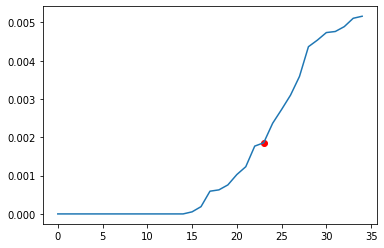

In [ ]:
point = 23
plt.scatter(point, top_eigvals[point], c='red')
_ = plt.plot(top_eigvals)

In [ ]:
m = 24

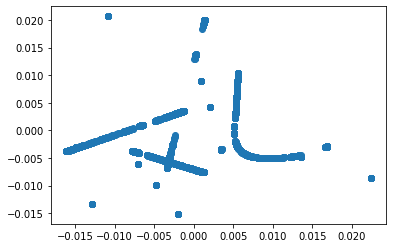

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
reduced_eig_vecs = pca.fit_transform(top_eigvecs[:, :23])

_ = plt.scatter(reduced_eig_vecs[:, 0], reduced_eig_vecs[:, 1])

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=m, covariance_type='full', n_init=1, random_state=0)
gmm.fit(top_eigvecs[:, :m])

GaussianMixture(n_components=24, random_state=0)

## Spectral Clustring Based on Random Walks

In [ ]:
labels = gmm.predict(top_eigvecs[:, :m])

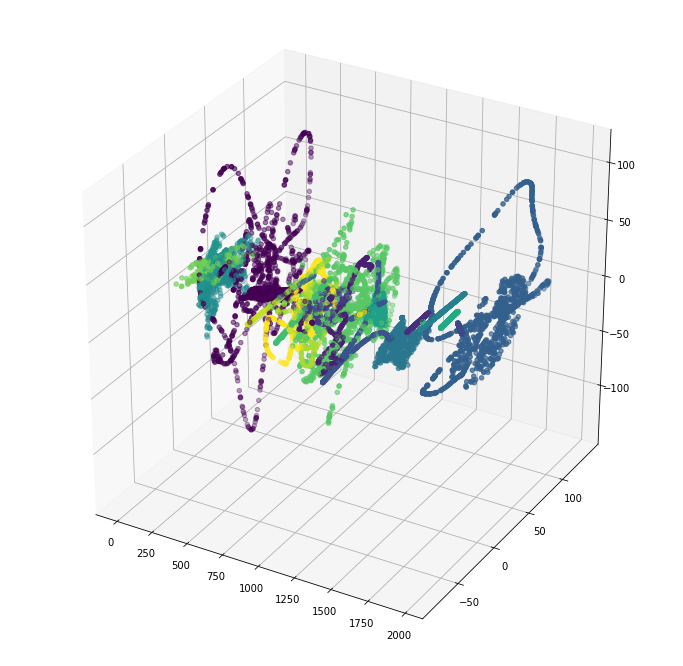

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2], c=labels)
_ = plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(main_vectors, labels)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
global_labels = clf.predict(vectors)

In [ ]:
global_labels[outlier_ind] = -1

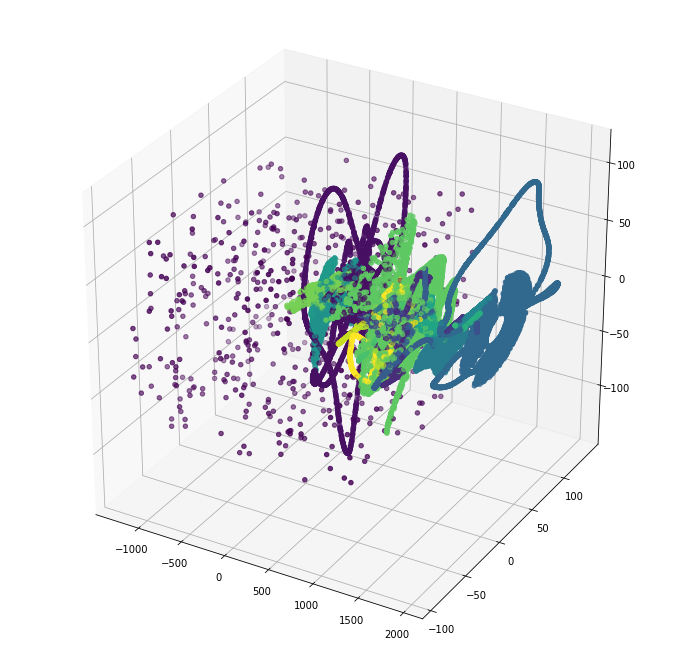

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c=global_labels)
_ = plt.show()

In [ ]:
from gap_statistic import OptimalK
from sknetwork.clustering import Louvain
from sknetwork.utils import KNNDense


def estimate_n_clusters_louvain(s_vectors):
  knn_graph = KNNDense().fit_transform(s_vectors)
  louvain = Louvain(resolution=1.0)
  labels = louvain.fit_transform(knn_graph)
  return labels.max()


def estimate_n_clusters(s_vectors):
  s_local_tangent = get_local_tangent(s_vectors, n_neighbors=21)
  s_probs_matrix = adjusted_random_walk(s_vectors, s_local_tangent,
                                        n_neighbors=32, path_length=16, steps=2)

  s_L = sparse.csgraph.laplacian(s_probs_matrix)
  s_top_eigvals, s_top_eigvecs = sparse.linalg.eigsh(s_L, k=3, which='SM')

  optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')
  n_clusters = optimalK(s_top_eigvecs, cluster_array=np.arange(1, 10))

  return n_clusters



manifolds_K = []

for manifold in range(m):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 5000)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  n_clusters = estimate_n_clusters_louvain(s_vectors)
  print(f'Manifold {manifold} contains {n_clusters} sub-clusters.')
  manifolds_K.append(n_clusters)




Manifold 0 contains 77 sub-clusters.
Manifold 1 contains 25 sub-clusters.
Manifold 2 contains 55 sub-clusters.
Manifold 3 contains 28 sub-clusters.
Manifold 4 contains 29 sub-clusters.
Manifold 5 contains 25 sub-clusters.
Manifold 6 contains 84 sub-clusters.
Manifold 7 contains 86 sub-clusters.
Manifold 8 contains 29 sub-clusters.
Manifold 9 contains 29 sub-clusters.
Manifold 10 contains 28 sub-clusters.
Manifold 11 contains 42 sub-clusters.
Manifold 12 contains 45 sub-clusters.
Manifold 13 contains 46 sub-clusters.
Manifold 14 contains 27 sub-clusters.
Manifold 15 contains 17 sub-clusters.
Manifold 16 contains 92 sub-clusters.
Manifold 17 contains 83 sub-clusters.
Manifold 18 contains 37 sub-clusters.
Manifold 19 contains 27 sub-clusters.
Manifold 20 contains 76 sub-clusters.
Manifold 21 contains 30 sub-clusters.
Manifold 22 contains 24 sub-clusters.
Manifold 23 contains 89 sub-clusters.


In [ ]:
manifolds_K_w = 1.0 * np.array(manifolds_K)
manifolds_K_w /= manifolds_K_w.sum()
K = np.maximum(np.round(manifolds_K_w * (k)), 1).astype(int)

In [ ]:
K[0] += 1

In [ ]:
K.sum()

49

In [ ]:
import skdim.id as intd

manifold_dims = []

for manifold in tqdm(range(m)):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 3000)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  lpca = intd.lPCA().fit_pw(s_vectors, n_neighbors = 128, n_jobs = 1)
  int_D = int(np.round(np.quantile(lpca.dimension_pw_, 0.2)))
  # int_D = int(np.round(lpca.dimension_pw_.mean()))
  print(f'Manifold {manifold} has dim {int_D}')
  manifold_dims.append(int_D)
  

  0%|          | 0/24 [00:00<?, ?it/s]

Manifold 0 has dim 3
Manifold 1 has dim 11
Manifold 2 has dim 2
Manifold 3 has dim 1
Manifold 4 has dim 3
Manifold 5 has dim 1
Manifold 6 has dim 2
Manifold 7 has dim 2
Manifold 8 has dim 1
Manifold 9 has dim 3
Manifold 10 has dim 1
Manifold 11 has dim 3
Manifold 12 has dim 2
Manifold 13 has dim 2
Manifold 14 has dim 1
Manifold 15 has dim 12
Manifold 16 has dim 1
Manifold 17 has dim 2
Manifold 18 has dim 3
Manifold 19 has dim 2
Manifold 20 has dim 2
Manifold 21 has dim 2
Manifold 22 has dim 2
Manifold 23 has dim 1


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


class AffineManifold():
  def __init__(self, int_dim):
    self.int_dim = int_dim

  def fit(self, X):
    self.shift = X.mean(axis=0)
    XS = X - self.shift
    self.dim = X.shape[1] - self.int_dim
    self.pca = PCA()
    self.pca.fit(XS)
  
  def check(self, thresh=0.1):
    ev = self.pca.explained_variance_[-self.dim:].mean()
    if ev < thresh:
      return True
    return False
  
  def get_affine(self):
    a = self.pca.components_[-self.dim:]
    b = a @ self.shift
    a = a.T
    return a, b
    
class SphereManifold():
  def __init__(self, int_dim):
    self.int_dim = int_dim

  def fit(self, X):
    self.shift = X.mean(axis=0)
    self.dim = X.shape[1] - self.int_dim
    center, radius = self.noisy_center_radius(X, 5)
    self.center = center
    self.radius = radius
    error = np.abs(np.linalg.norm(X - center, axis=1) - radius)
    self.error_std = np.std(error)
    self.error_mean = np.mean(error)
    self.aff = AffineManifold(self.int_dim)
    self.aff.fit(X)

  def check(self, thresh=5.0):
    # print('std ', self.error_std)
    # print('mean', self.error_mean)
    # print('radius', self.radius)
    if (self.error_std < thresh) and (self.error_mean < 0.3*self.radius):
      return True
    return False

  def noisy_center_radius(self, points, k):
    dist_matrix = np.zeros((points.shape[0], points.shape[0]))
    for i in range(points.shape[0]):
      for j in range(i):
        dist = np.linalg.norm(points[i] - points[j])
        dist_matrix[i, j] = dist
    dist_matrix = dist_matrix.reshape(-1)
    top_k_dist = np.argsort(dist_matrix)[-k:]
    rows = top_k_dist // points.shape[0]
    cols = top_k_dist % points.shape[0]
    center = 0.5*(points[cols] + points[rows]).mean(axis=0)
    radius = dist_matrix[top_k_dist].mean()/2
    return center, radius
  
  def get_affine(self):
    return self.aff.get_affine()
  



def manifold_type(points, int_d):
  sph = SphereManifold(int_d)
  sph.fit(points)
  if sph.check():
    return 'Sphere', sph
  # test affinity
  aff = AffineManifold(int_d)
  aff.fit(points)
  if aff.check():
    return 'Affine', aff
  return 'Complex', None

manifolds_types = []
manifolds_specs = []

for manifold in range(m):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 1200)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  mantype, spec = manifold_type(s_vectors, manifold_dims[manifold])
  print(f'Manifold {manifold} is {manifold_dims[manifold]}-{mantype}')
  manifolds_types.append(mantype)
  manifolds_specs.append(spec)

Manifold 0 is 3-Complex
Manifold 1 is 11-Complex
Manifold 2 is 2-Complex
Manifold 3 is 1-Affine
Manifold 4 is 3-Complex
Manifold 5 is 1-Affine
Manifold 6 is 2-Complex
Manifold 7 is 2-Complex
Manifold 8 is 1-Affine
Manifold 9 is 3-Complex
Manifold 10 is 1-Affine
Manifold 11 is 3-Complex
Manifold 12 is 2-Complex
Manifold 13 is 2-Complex
Manifold 14 is 1-Affine
Manifold 15 is 12-Sphere
Manifold 16 is 1-Complex
Manifold 17 is 2-Complex
Manifold 18 is 3-Complex
Manifold 19 is 2-Affine
Manifold 20 is 2-Complex
Manifold 21 is 2-Affine
Manifold 22 is 2-Affine
Manifold 23 is 1-Complex


In [ ]:
np.unique(global_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23])

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


sub_clusters = []
for sphere in tqdm(range(m)):
  points = vectors[global_labels==sphere]
  original_index = np.where(global_labels==sphere)[0]

  sub_manifold_size = points.shape[0]
  s_sample_size = min(sub_manifold_size, 3000)
  # s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_sample_ind = manifold_sampler(points, s_sample_size)
  s_vectors = points[s_sample_ind, :]

  s_cluster = SpectralClustering(n_clusters=K[sphere], random_state=0, affinity='nearest_neighbors')
  s_cluster.fit(s_vectors)

  s_labels = s_cluster.labels_

  clf = KNeighborsClassifier(n_neighbors=1)
  clf.fit(s_vectors, s_labels)

  sub_manifold_labels = clf.predict(points)


  submanifold_clusters = []
  for subc in range(K[sphere]):
    submanifold_clusters.append(original_index[np.where(sub_manifold_labels == subc)])
  sub_clusters.append(submanifold_clusters)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/9501 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3268 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4354 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2556 [00:00<?, ?it/s]

  0%|          | 0/2556 [00:00<?, ?it/s]

  0%|          | 0/5636 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2970 [00:00<?, ?it/s]

  0%|          | 0/2970 [00:00<?, ?it/s]

  0%|          | 0/4431 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5328 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2793 [00:00<?, ?it/s]

  0%|          | 0/2793 [00:00<?, ?it/s]

  0%|          | 0/4927 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2658 [00:00<?, ?it/s]

  0%|          | 0/2658 [00:00<?, ?it/s]

  0%|          | 0/2605 [00:00<?, ?it/s]

  0%|          | 0/2605 [00:00<?, ?it/s]

  0%|          | 0/2738 [00:00<?, ?it/s]

  0%|          | 0/2738 [00:00<?, ?it/s]

  0%|          | 0/2577 [00:00<?, ?it/s]

  0%|          | 0/2577 [00:00<?, ?it/s]

  0%|          | 0/2352 [00:00<?, ?it/s]

  0%|          | 0/2352 [00:00<?, ?it/s]

  0%|          | 0/2556 [00:00<?, ?it/s]

  0%|          | 0/2556 [00:00<?, ?it/s]

  0%|          | 0/3307 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/6434 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2605 [00:00<?, ?it/s]

  0%|          | 0/2605 [00:00<?, ?it/s]

  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/2630 [00:00<?, ?it/s]

  0%|          | 0/2630 [00:00<?, ?it/s]

  0%|          | 0/1579 [00:00<?, ?it/s]

  0%|          | 0/1579 [00:00<?, ?it/s]

  0%|          | 0/844 [00:00<?, ?it/s]

  0%|          | 0/844 [00:00<?, ?it/s]

  0%|          | 0/3307 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
with open('output_silver.txt', 'w+') as fp:
  fp.write(f'{n} {m}\n')
  for manifold in range(m):
    fp.write(f'{manifold_dims[manifold]} {K[manifold]} {manifolds_types[manifold]}\n')
    if manifolds_types[manifold] in ['Affine', 'Sphere']:
      if manifold_dims[manifold] == d:
        fp.write('\n')
      else:
        spec = manifolds_specs[manifold]
        affine_a, affine_b = spec.get_affine()
        for i in range(affine_a.shape[1]):
          fp.write(' '.join(affine_a[:, i].astype(str).tolist()) + '\n')
        fp.write(' '.join(affine_b.astype(str).tolist()) + '\n')
      if manifolds_types[manifold] == 'Sphere':
        fp.write(' '.join(spec.center.astype(str).tolist()) + f' {spec.radius} \n')
    for subc in range(K[manifold]):
      subc_points = sub_clusters[manifold][subc]
      fp.write(f'{len(subc_points)} ')
      fp.write(' '.join((subc_points+1).astype(str).tolist()))
      fp.write('\n')
  fp.write(f'{p}')
  if p > 0:
    fp.write(' ' + ' '.join((np.array(outlier_ind)+1).astype(str).tolist()))